In [1]:
import pandas as pd

# 예제. 중고 자동차 가격

* 출처: https://www.datamanim.com/dataset/03_dataq/pandas_practice.html#id24

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,Tucson,2016,12795,Manual,36263,Diesel,30,61.7,1.7
1,I10,2012,3995,Manual,22089,Petrol,20,61.4,1.2
2,I30,2019,24000,Manual,555,Petrol,145,34.0,2.0
3,Tucson,2017,12995,Manual,32147,Diesel,30,61.7,1.7
4,Tucson,2018,14991,Semi-Auto,32217,Diesel,150,57.6,1.7


In [4]:
# 이 데이터셋에서 다루고 있는 차량 종류는?
df['model'].unique()

array([' Tucson', ' I10', ' I30', ' IX20', ' I20', ' Ioniq', ' Kona',
       ' I40', ' IX35', ' I800', ' Santa Fe', ' Getz', ' Accent',
       ' Veloster', ' Terracan', ' Amica'], dtype=object)

In [6]:
df[df['model']==' I10']

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
1,I10,2012,3995,Manual,22089,Petrol,20,61.4,1.2
5,I10,2017,7995,Manual,19750,Petrol,145,57.7,1.2
7,I10,2018,7500,Manual,40050,Petrol,150,60.1,1.0
13,I10,2017,8855,Manual,10392,Petrol,145,57.7,1.2
14,I10,2017,7500,Manual,12717,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
3860,I10,2017,6695,Manual,9121,Petrol,20,60.1,1.0
3865,I10,2018,7291,Manual,13746,Petrol,150,60.1,1.0
3872,I10,2013,4120,Manual,42186,Petrol,20,61.4,1.2
3883,I10,2016,6500,Manual,16309,Petrol,30,57.6,1.2


In [32]:
# 정보(row수)가 가장 많은 상위 3차종의 price값의 각 평균값은?
df['model'].value_counts().index[:3]
# df.model.value_counts() -> 위에 코드랑 같은 뜻
# value_counts()

# 인덱스 연산

# index
df[(df['model'] == df['model'].value_counts().index[:3][0])
&(df['model'] == df['model'].value_counts().index[:3][1])
&(df['model'] == df['model'].value_counts().index[:3][2])]

# isin() 조건
# df['model'].isin([' Tucson',' I10', 'I30'])
df[df['model'].isin(df.model.value_counts().index[:3])]

# 조건을 이용하여 데이터 추출
df[df['model'].isin(df.model.value_counts().index[:3])].groupby("model").mean()['price'].to_frame() #shape(3,1)
# df[df['model'].isin(df.model.value_counts().index[:3])].groupby("model").mean()['price'].reset_index() #shape(3,2)
# to_frame()


,price
model,
I10,7646.137891
I30,11651.821759
Tucson,15805.441373


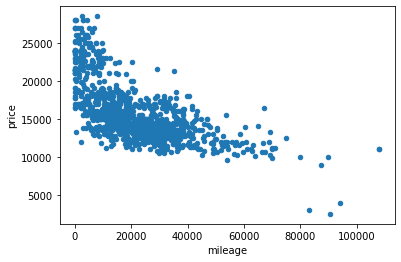

In [35]:
# 마일리지-가격 그래프 그리기
df[df['model']==' Tucson'].plot.scatter(x='mileage', y='price');
#세미콜론 붙이면, 그래프위에 쓸데없는 말(?)들이 사라쥠

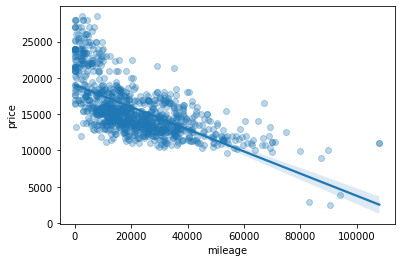

In [40]:
# 추세선 그리기
# https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
# https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha
import seaborn as sns

ax = sns.regplot(x="mileage", 
                y="price", 
                data=df[df['model']==' Tucson'], 
                scatter_kws={'alpha':0.3})



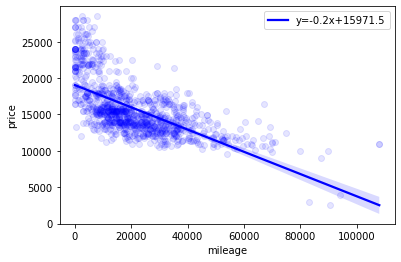

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df['mileage'],df['price'])
#ㄴ기울기와, ㄴ절편!

# use line_kws to set line label for legend
ax = sns.regplot(x="mileage", y="price", data=df[df['model']==' Tucson'], color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, scatter_kws={'alpha':0.1})

# plot legend => 범례
ax.legend()

plt.show()

# 예제. 결측치, 이상치 처리

In [48]:
# 엑셀파일 읽기
df = pd.read_excel('결측치예제.xlsx')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# 결측치를 찾아, (N/A)로 채우기 (엑셀과 비교)
# df.loc[행조건, 열조건]
df.loc[~df["Age"].isna()] #age가 Nan 값이 아닌것 찾는...
df.loc[df["Age"].isna(), "Age"]="(N/A)" # age가 NaN값인것을 찾아서 (N/A)라는 글자 넣어주기

In [52]:
# Age가 없는 데이터 삭제하기
df= df[df['Age']!='(N/A)']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


Q3 : 100개의 데이터로 가정 시, 25번째로 높은 값에 해당합니다.

Q1 : 100개의 데이터로 가정 시, 75번째로 높은 값에 해당합니다.

IQR : Q3 - Q1의 차이를 의미합니다.

이상치 : Q3 + 1.5 * IQR보다 높거나 Q1 - 1.5 * IQR보다 낮은 값을 의미합니다.

In [55]:
import numpy as np
# 이상치를 판별하는 함수룰 만들기 위해, q1, q3, iqr 구하기
q1 = np.quantile(df['Fare'], 0.25)
q3 = np.quantile(df['Fare'], 0.75)
iqr = q3 - q1
print(q1, q3, iqr)


10.362475 31.303124999999998 20.940649999999998


In [56]:
# 이상치를 판별하는 함수를 만들어보자. 먼저, q1, q3, iqr 구하기
def is_okay(x):
  if q1-1.5*iqr <=x <= q3-1.5*iqr:
    return True
  return False


In [61]:
# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df['check']= df['Fare'].apply(is_okay) 
df[~df["check"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,check
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False


# 예제. pandas에서 문자열 처리

In [64]:
# 엑셀파일 읽기
df = pd.read_excel('문자열예제.xlsx', header=1) #헤더1을 하면, 맨위에 제목줄이 없어진다.
df.head()

,성별,학년과 전공,학년,전공
0,1,2:커뮤니케이션과,NaN,NaN
1,1,3:화장품공학과,NaN,NaN
2,2,2:수학과,NaN,NaN
3,2,3:경영과,NaN,NaN
4,2,1:컴공과,NaN,NaN


In [68]:
# "학년과 전공"를 "학년"과 "전공"으로 나누기
df['학년']=df["학년과 전공"].str.split(':').str[0]
df['전공']=df["학년과 전공"].str.split(':').str[1]
df

,성별,학년과 전공,학년,전공
0,1,2:커뮤니케이션과,2,커뮤니케이션과
1,1,3:화장품공학과,3,화장품공학과
2,2,2:수학과,2,수학과
3,2,3:경영과,3,경영과
4,2,1:컴공과,1,컴공과
5,2,1:경영정보학과,1,경영정보학과
6,2,1:컴공과,1,컴공과
7,1,1:수학과,1,수학과
8,2,1:건축과,1,건축과
9,2,1:사학과,1,사학과


In [71]:
# "학년과 전공"를 "학년"과 "전공"으로 나누기
# https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns
# df[['A', 'B']] = df['AB'].str.split(' ', 1, expand=True)
df[['학년', '전공']] = df['학년과 전공'].str.split(':', 1, expand=True) #1은 한번만 나누겠다는 뜻...
df

,성별,학년과 전공,학년,전공
0,1,2:커뮤니케이션과,2,커뮤니케이션과
1,1,3:화장품공학과,3,화장품공학과
2,2,2:수학과,2,수학과
3,2,3:경영과,3,경영과
4,2,1:컴공과,1,컴공과
5,2,1:경영정보학과,1,경영정보학과
6,2,1:컴공과,1,컴공과
7,1,1:수학과,1,수학과
8,2,1:건축과,1,건축과
9,2,1:사학과,1,사학과


In [74]:
# 전공은 오름차순, 학년은 내림차순으로 정렬하시오.
df.sort_values(["전공", "학년"], ascending=[True, False])

,성별,학년과 전공,학년,전공
8,2,1:건축과,1,건축과
3,2,3:경영과,3,경영과
23,1,3:경영과,3,경영과
22,1,2:경영과,2,경영과
5,2,1:경영정보학과,1,경영정보학과
13,1,1:경영정보학과,1,경영정보학과
21,1,3:국문과,3,국문과
18,2,2:국문과,2,국문과
16,1,2:보안과,2,보안과
17,1,3:사학과,3,사학과
